## Simulation

In [1]:
from data_simulation import process_price_traces

start_price =  100
alpha = 1.0
time_steps = 100
num_traces = 500

process_traces = process_price_traces(
    start_price=start_price,
    alpha=alpha,
    time_steps=time_steps,
    num_traces=num_traces
)

trace = process_traces[0]

Text(27.125, 0.5, 'Price')

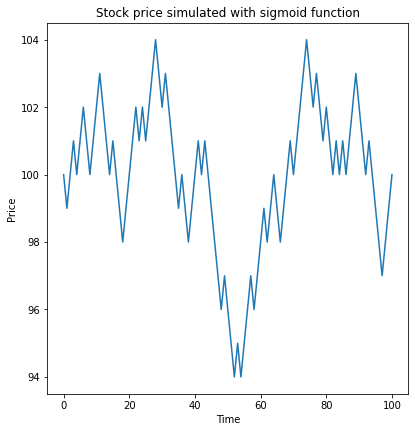

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1, figsize=(6, 6),)

fig.tight_layout(pad=2)

axs.plot(range(len(trace)), trace,)
axs.set_title("Stock price simulated with sigmoid function")
axs.set_xlabel("Time")
axs.set_ylabel("Price")

## Historical data

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sp500 = yf.download("^GSPC", start="2021-05-8", end="2023-05-7", interval="1h")
sp500 = sp500['Adj Close'] - sp500['Open']

[*********************100%***********************]  1 of 1 completed


### Seasonality test on the historical data

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [6]:
adft = adfuller(sp500, autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
print(output)


Test Statistics                 -21.679726
p-value                           0.000000
No. of lags used                  6.000000
Number of observations used    3499.000000
critical value (1%)              -3.432220
critical value (5%)              -2.862366
critical value (10%)             -2.567210
dtype: float64


In [7]:
goog = yf.download("GOOG", start="2021-05-8", end="2023-05-7", interval="1h")
goog = goog['Close']

adft = adfuller(goog, autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
print(output)

[*********************100%***********************]  1 of 1 completed
Test Statistics                  -1.292830
p-value                           0.632446
No. of lags used                  0.000000
Number of observations used    3505.000000
critical value (1%)              -3.432217
critical value (5%)              -2.862365
critical value (10%)             -2.567209
dtype: float64


<Figure size 640x480 with 0 Axes>

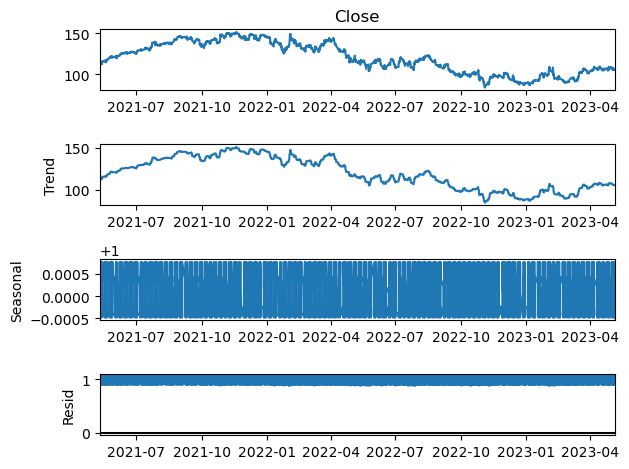

In [10]:
result = seasonal_decompose(x=goog, model='multiplicative', period=12)
fig = plt.figure()
fig = result.plot()

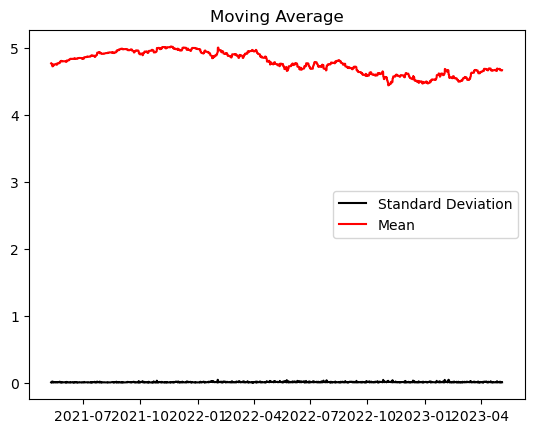

In [9]:
# eliminate trend
from pylab import rcParams

df_log = np.log(goog)
moving_avg = df_log.rolling(6).mean()
std_dev = df_log.rolling(6).std()
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()